# Complete Decision Tree Tutorial: Classification & Regression

## 📚 Learning Objectives

In this comprehensive tutorial, you will learn:

1. **Decision Tree Fundamentals**: Understanding how decision trees work
2. **Key Concepts**: Gini Impurity, Information Gain, Variance Reduction, Entropy
3. **Decision Tree Classifier**: Building classification models with evaluation metrics
4. **Decision Tree Regressor**: Building regression models with evaluation metrics
5. **Feature Importance**: Understanding which features matter most
6. **Tree Visualization**: Visualizing decision trees
7. **Hyperparameter Tuning**: Optimizing tree depth, split criteria, and more
8. **Overfitting Prevention**: Pruning and regularization techniques

---

## 🌳 What are Decision Trees?

**Decision Trees** are supervised learning algorithms that work for both classification and regression tasks. They learn simple decision rules from data features to predict a target variable.

**Key Advantages:**
- Easy to understand and interpret
- Requires little data preprocessing
- Can handle both numerical and categorical data
- Non-parametric (no assumptions about data distribution)

**Key Concepts:**
- **Node**: A decision point in the tree
- **Root Node**: The topmost node
- **Leaf Node**: Terminal node with prediction
- **Splitting**: Dividing a node into sub-nodes
- **Pruning**: Removing branches to prevent overfitting

---

## 📊 Datasets Used

1. **Classification**: Iris Dataset (flower species classification)
2. **Regression**: Diabetes Dataset (disease progression prediction)


# Complete Decision Tree Tutorial: Classification & Regression

## 📚 Learning Objectives

In this comprehensive tutorial, you will learn:

1. **Decision Tree Fundamentals**: Understanding how decision trees work
2. **Key Concepts**: Gini Impurity, Information Gain, Variance Reduction, Entropy
3. **Decision Tree Classifier**: Building classification models with evaluation metrics
4. **Decision Tree Regressor**: Building regression models with evaluation metrics
5. **Feature Importance**: Understanding which features matter most
6. **Tree Visualization**: Visualizing decision trees
7. **Hyperparameter Tuning**: Optimizing tree depth, split criteria, and more
8. **Overfitting Prevention**: Pruning and regularization techniques

---

## 🌳 What are Decision Trees?

**Decision Trees** are supervised learning algorithms that work for both classification and regression tasks. They learn simple decision rules from data features to predict a target variable.

**Key Advantages:**
- Easy to understand and interpret
- Requires little data preprocessing
- Can handle both numerical and categorical data
- Non-parametric (no assumptions about data distribution)

**Key Concepts:**
- **Node**: A decision point in the tree
- **Root Node**: The topmost node
- **Leaf Node**: Terminal node with prediction
- **Splitting**: Dividing a node into sub-nodes
- **Pruning**: Removing branches to prevent overfitting

---

## 📊 Datasets Used

### 1. **Classification: Iris Dataset**
- **Purpose**: Flower species classification (3 classes)
- **Samples**: 150 observations
- **Features** (4 continuous measurements in cm):
  - `sepal length (cm)`: Length of the sepal
  - `sepal width (cm)`: Width of the sepal
  - `petal length (cm)`: Length of the petal
  - `petal width (cm)`: Width of the petal
- **Target Variable**: Species (setosa, versicolor, virginica)
- **Source**: Ronald Fisher (1936)
- **Use Case**: Multi-class classification problem


---
## 1. Importing Required Libraries


In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Datasets
from sklearn.datasets import load_iris, load_diabetes

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Machine Learning - Models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text

# Machine Learning - Metrics for Classification
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)

# Machine Learning - Metrics for Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Settings for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully!")


✓ All libraries imported successfully!


---
---
---

# PART 1: DECISION TREE CLASSIFIER

---
---
---

## 2. Decision Tree Classifier - Data Loading

We'll use the **Iris Dataset**, a classic dataset for classification containing measurements of iris flowers from three different species.


In [ ]:
# Load Iris dataset
iris = load_iris(as_frame=True)

# Create DataFrame
df_iris = iris.frame
df_iris['species'] = df_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("=" * 70)
print("IRIS DATASET FOR CLASSIFICATION")
print("=" * 70)
print(f"Dataset shape: {df_iris.shape}")
print(f"Number of samples: {df_iris.shape[0]}")
print(f"Number of features: {len(iris.feature_names)}")
print(f"\nFeatures: {iris.feature_names}")
print(f"\nTarget classes: {iris.target_names}")
print("\nFirst 5 rows:")
print(df_iris.head())


IRIS DATASET FOR CLASSIFICATION
Dataset shape: (150, 6)
Number of samples: 150
Number of features: 4

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target classes: ['setosa' 'versicolor' 'virginica']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


### 2.1 Exploratory Data Analysis - Classification Data


In [ ]:
# Statistical summary
print("Statistical Summary:")
print("=" * 70)
print(df_iris.describe())

# Class distribution
print("\n\nClass Distribution:")
print("=" * 70)
print(df_iris['species'].value_counts())
print(f"\nClass balance: {df_iris['species'].value_counts().to_dict()}")


Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count            150.000           150.000            150.000   
mean               5.843             3.057              3.758   
std                0.828             0.436              1.765   
min                4.300             2.000              1.000   
25%                5.100             2.800              1.600   
50%                5.800             3.000              4.350   
75%                6.400             3.300              5.100   
max                7.900             4.400              6.900   

       petal width (cm)   target  
count           150.000  150.000  
mean              1.199    1.000  
std               0.762    0.819  
min               0.100    0.000  
25%               0.300    0.000  
50%               1.300    1.000  
75%               1.800    2.000  
max               2.500    2.000  


Class Distribution:
species
setosa        50
versicolor    50
virginica     

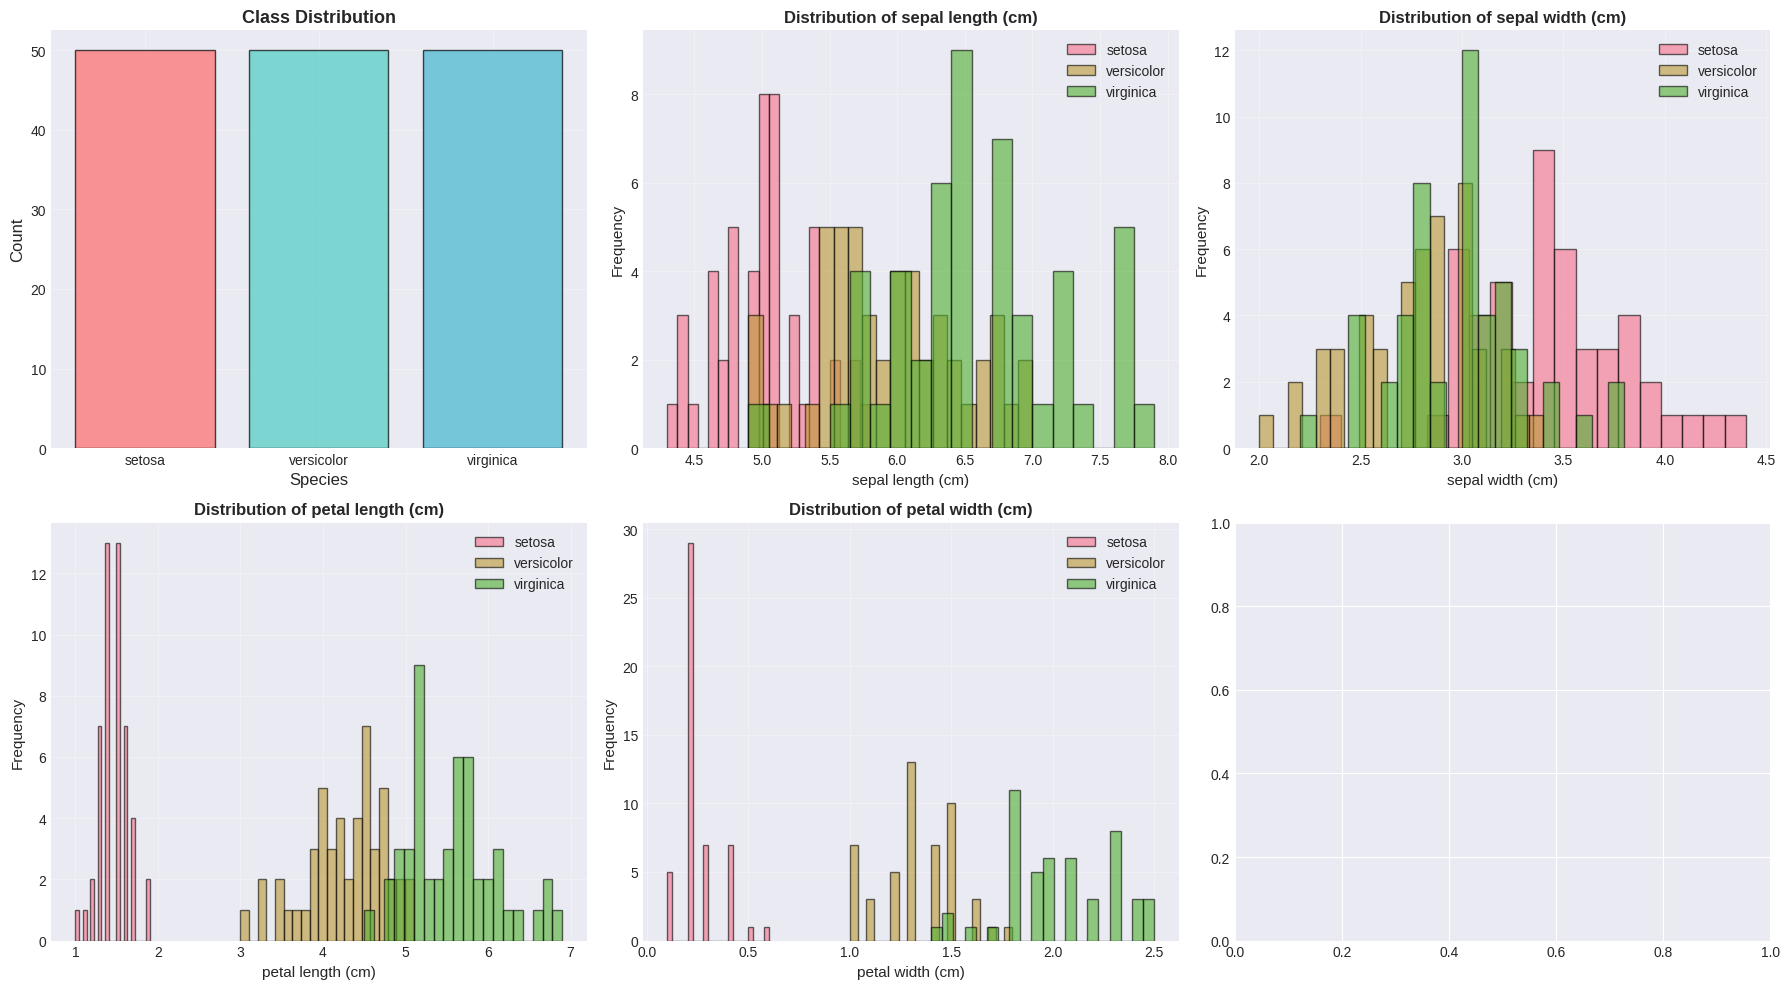

In [ ]:
# Visualize class distribution and feature distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Class distribution
axes[0, 0].bar(df_iris['species'].value_counts().index, df_iris['species'].value_counts().values,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Species', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('Class Distribution', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Feature distributions
for idx, feature in enumerate(iris.feature_names):
    row = (idx + 1) // 3
    col = (idx + 1) % 3

    for species in df_iris['species'].unique():
        data = df_iris[df_iris['species'] == species][feature]
        axes[row, col].hist(data, alpha=0.6, label=species, bins=20, edgecolor='black')

    axes[row, col].set_xlabel(feature, fontsize=11)
    axes[row, col].set_ylabel('Frequency', fontsize=11)
    axes[row, col].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


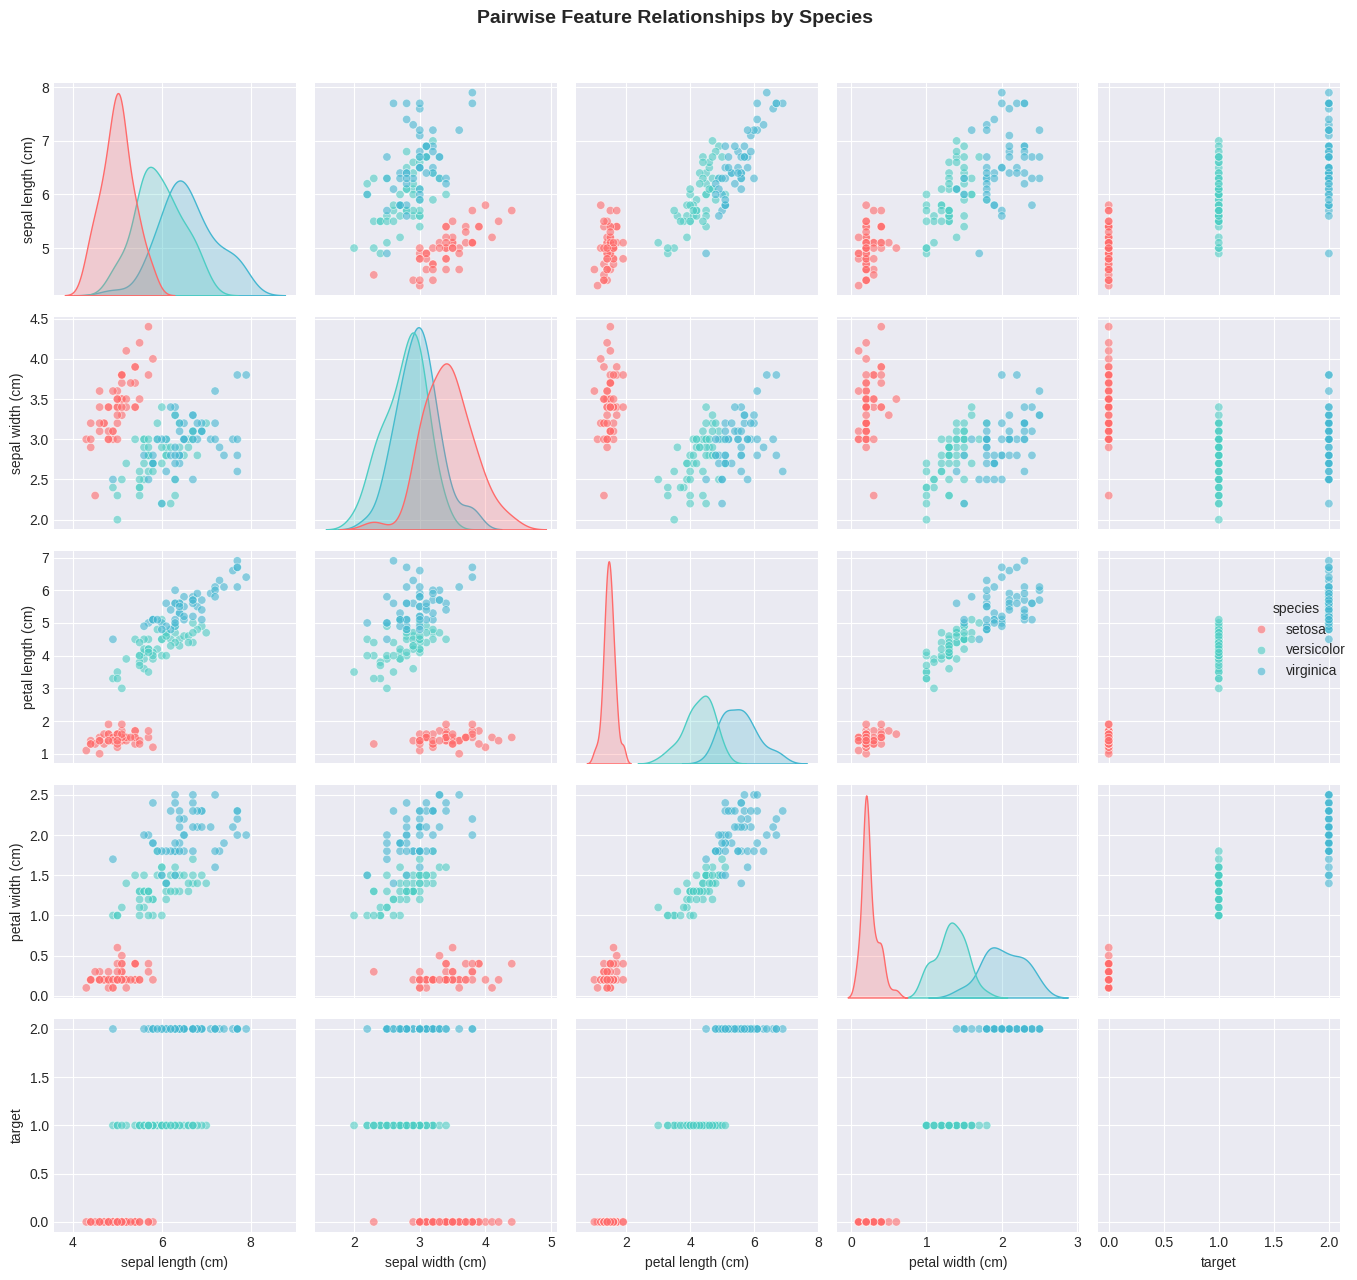

In [ ]:
# Pairplot to see relationships
sns.pairplot(df_iris, hue='species', diag_kind='kde',
             palette=['#FF6B6B', '#4ECDC4', '#45B7D1'],
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Feature Relationships by Species', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 2.2 Correlation Analysis - Classification


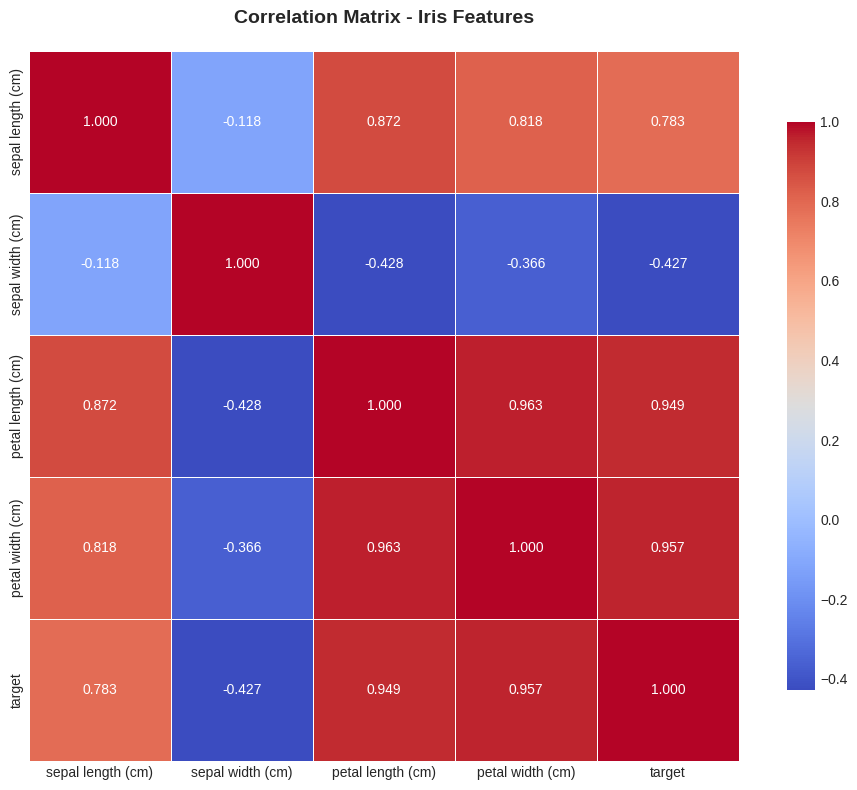


Correlation with Target:
target               1.000
petal width (cm)     0.957
petal length (cm)    0.949
sepal length (cm)    0.783
sepal width (cm)    -0.427
Name: target, dtype: float64


In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_iris[iris.feature_names + ['target']].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Iris Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Target:")
print("=" * 50)
print(correlation_matrix['target'].sort_values(ascending=False))


## 3. Understanding Split Criteria for Classification

Before building our model, let's understand how Decision Trees split data.

### 3.1 Gini Impurity

**Gini Impurity** measures the probability of incorrectly classifying a randomly chosen element.

**Formula:** Gini = 1 - Σ(pᵢ)²

Where pᵢ is the probability of class i.

- Gini = 0: Pure node (all samples belong to one class)
- Gini = 0.5: Maximum impurity (binary classification)

### 3.2 Entropy & Information Gain

**Entropy** measures the disorder or uncertainty in data.

**Formula:** Entropy = -Σ(pᵢ × log₂(pᵢ))

**Information Gain** = Entropy(parent) - Weighted Average Entropy(children)

Decision Trees choose splits that maximize Information Gain (or minimize Gini Impurity).


In [ ]:
# Example: Calculate Gini Impurity
def calculate_gini(labels):
    """Calculate Gini Impurity for a set of labels"""
    if len(labels) == 0:
        return 0

    # Count occurrences of each class
    unique, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)

    # Gini = 1 - sum(p^2)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Calculate for each species
print("Gini Impurity Examples:")
print("=" * 70)

for species_name in df_iris['species'].unique():
    species_data = df_iris[df_iris['species'] == species_name]['target'].values
    gini = calculate_gini(species_data)
    print(f"Gini for pure {species_name} node: {gini:.4f} (Pure node)")

# Calculate for mixed sample
mixed_sample = df_iris['target'].values[:30]  # Mix of classes
gini_mixed = calculate_gini(mixed_sample)
print(f"\nGini for mixed sample: {gini_mixed:.4f} (Impure node)")

# Calculate for entire dataset
gini_all = calculate_gini(df_iris['target'].values)
print(f"Gini for entire dataset: {gini_all:.4f}")


Gini Impurity Examples:
Gini for pure setosa node: 0.0000 (Pure node)
Gini for pure versicolor node: 0.0000 (Pure node)
Gini for pure virginica node: 0.0000 (Pure node)

Gini for mixed sample: 0.0000 (Impure node)
Gini for entire dataset: 0.6667


## 4. Data Preparation - Classification


In [ ]:
# Prepare features and target
X_iris = iris.data
y_iris = iris.target

# Split the data (70% train, 30% test)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

print("Data Split for Classification:")
print("=" * 70)
print(f"Training set: {X_train_clf.shape[0]} samples ({X_train_clf.shape[0]/len(X_iris)*100:.1f}%)")
print(f"Testing set: {X_test_clf.shape[0]} samples ({X_test_clf.shape[0]/len(X_iris)*100:.1f}%)")
print(f"\nFeature matrix shape: {X_iris.shape}")
print(f"Target vector shape: {y_iris.shape}")

# Check class distribution in splits
print("\nClass distribution in training set:")
unique, counts = np.unique(y_train_clf, return_counts=True)
for class_id, count in zip(unique, counts):
    print(f"  {iris.target_names[class_id]}: {count} samples")

print("\nClass distribution in testing set:")
unique, counts = np.unique(y_test_clf, return_counts=True)
for class_id, count in zip(unique, counts):
    print(f"  {iris.target_names[class_id]}: {count} samples")


Data Split for Classification:
Training set: 105 samples (70.0%)
Testing set: 45 samples (30.0%)

Feature matrix shape: (150, 4)
Target vector shape: (150,)

Class distribution in training set:
  setosa: 35 samples
  versicolor: 35 samples
  virginica: 35 samples

Class distribution in testing set:
  setosa: 15 samples
  versicolor: 15 samples
  virginica: 15 samples


## 5. Building Decision Tree Classifier

### 5.1 Train the Model


In [ ]:
# Create Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    criterion='gini',           # Split criterion: 'gini' or 'entropy'
    max_depth=4,               # Maximum depth of tree
    min_samples_split=2,       # Minimum samples required to split a node
    min_samples_leaf=1,        # Minimum samples required at a leaf node
    random_state=42
)

# Train the model
dt_classifier.fit(X_train_clf, y_train_clf)

print("Decision Tree Classifier - Model Information:")
print("=" * 70)
print(f"Criterion: {dt_classifier.criterion}")
print(f"Max Depth: {dt_classifier.max_depth}")
print(f"Actual Tree Depth: {dt_classifier.get_depth()}")
print(f"Number of Leaves: {dt_classifier.get_n_leaves()}")
print(f"Number of Features: {dt_classifier.n_features_in_}")
print(f"Classes: {dt_classifier.classes_}")
print("\n✓ Model trained successfully!")


Decision Tree Classifier - Model Information:
Criterion: gini
Max Depth: 4
Actual Tree Depth: 4
Number of Leaves: 7
Number of Features: 4
Classes: [0 1 2]

✓ Model trained successfully!


### 5.2 Make Predictions


In [ ]:
# Make predictions
y_train_pred_clf = dt_classifier.predict(X_train_clf)
y_test_pred_clf = dt_classifier.predict(X_test_clf)

# Get probability predictions
y_test_pred_proba_clf = dt_classifier.predict_proba(X_test_clf)

# Display sample predictions
print("Sample Predictions (First 10 Test Samples):")
print("=" * 70)
predictions_clf_df = pd.DataFrame({
    'Actual': [iris.target_names[i] for i in y_test_clf[:10]],
    'Predicted': [iris.target_names[i] for i in y_test_pred_clf[:10]],
    'Correct': y_test_clf[:10] == y_test_pred_clf[:10]
})

for idx in range(10):
    predictions_clf_df.loc[idx, 'Prob_Setosa'] = f"{y_test_pred_proba_clf[idx][0]:.3f}"
    predictions_clf_df.loc[idx, 'Prob_Versicolor'] = f"{y_test_pred_proba_clf[idx][1]:.3f}"
    predictions_clf_df.loc[idx, 'Prob_Virginica'] = f"{y_test_pred_proba_clf[idx][2]:.3f}"

print(predictions_clf_df)


Sample Predictions (First 10 Test Samples):
         Actual   Predicted Correct Prob_Setosa Prob_Versicolor Prob_Virginica
107   virginica   virginica    True         NaN             NaN            NaN
63   versicolor  versicolor    True         NaN             NaN            NaN
133   virginica   virginica    True         NaN             NaN            NaN
56   versicolor   virginica   False         NaN             NaN            NaN
127   virginica   virginica    True         NaN             NaN            NaN
140   virginica   virginica    True         NaN             NaN            NaN
53   versicolor  versicolor    True         NaN             NaN            NaN
69   versicolor  versicolor    True         NaN             NaN            NaN
20       setosa      setosa    True         NaN             NaN            NaN
141   virginica   virginica    True         NaN             NaN            NaN
0           NaN         NaN     NaN       0.000           0.000          1.000
1       

## 6. Model Evaluation - Classification Metrics

### 6.1 Accuracy, Precision, Recall, F1-Score


In [ ]:
# Calculate metrics for training set
train_accuracy_clf = accuracy_score(y_train_clf, y_train_pred_clf)
train_precision_clf = precision_score(y_train_clf, y_train_pred_clf, average='weighted')
train_recall_clf = recall_score(y_train_clf, y_train_pred_clf, average='weighted')
train_f1_clf = f1_score(y_train_clf, y_train_pred_clf, average='weighted')

# Calculate metrics for test set
test_accuracy_clf = accuracy_score(y_test_clf, y_test_pred_clf)
test_precision_clf = precision_score(y_test_clf, y_test_pred_clf, average='weighted')
test_recall_clf = recall_score(y_test_clf, y_test_pred_clf, average='weighted')
test_f1_clf = f1_score(y_test_clf, y_test_pred_clf, average='weighted')

# Display results
print("DECISION TREE CLASSIFIER - MODEL EVALUATION")
print("=" * 70)
print(f"\n{'Metric':<20} {'Training Set':<20} {'Testing Set':<20}")
print("-" * 70)
print(f"{'Accuracy':<20} {train_accuracy_clf:<20.4f} {test_accuracy_clf:<20.4f}")
print(f"{'Precision':<20} {train_precision_clf:<20.4f} {test_precision_clf:<20.4f}")
print(f"{'Recall':<20} {train_recall_clf:<20.4f} {test_recall_clf:<20.4f}")
print(f"{'F1-Score':<20} {train_f1_clf:<20.4f} {test_f1_clf:<20.4f}")
print("=" * 70)

print("\n📊 Interpretation:")
print(f"  • Accuracy: {test_accuracy_clf*100:.2f}% of predictions are correct")
print(f"  • Precision: {test_precision_clf*100:.2f}% of positive predictions are correct")
print(f"  • Recall: {test_recall_clf*100:.2f}% of actual positives are identified")
print(f"  • F1-Score: {test_f1_clf:.4f} (Harmonic mean of precision and recall)")


DECISION TREE CLASSIFIER - MODEL EVALUATION

Metric               Training Set         Testing Set         
----------------------------------------------------------------------
Accuracy             0.9905               0.8889              
Precision            0.9907               0.8899              
Recall               0.9905               0.8889              
F1-Score             0.9905               0.8888              

📊 Interpretation:
  • Accuracy: 88.89% of predictions are correct
  • Precision: 88.99% of positive predictions are correct
  • Recall: 88.89% of actual positives are identified
  • F1-Score: 0.8888 (Harmonic mean of precision and recall)


### 6.2 Detailed Classification Report


In [ ]:
# Classification report
print("Classification Report (Test Set):")
print("=" * 70)
print(classification_report(y_test_clf, y_test_pred_clf,
                          target_names=iris.target_names))


Classification Report (Test Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.86      0.80      0.83        15
   virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



### 6.3 Confusion Matrix


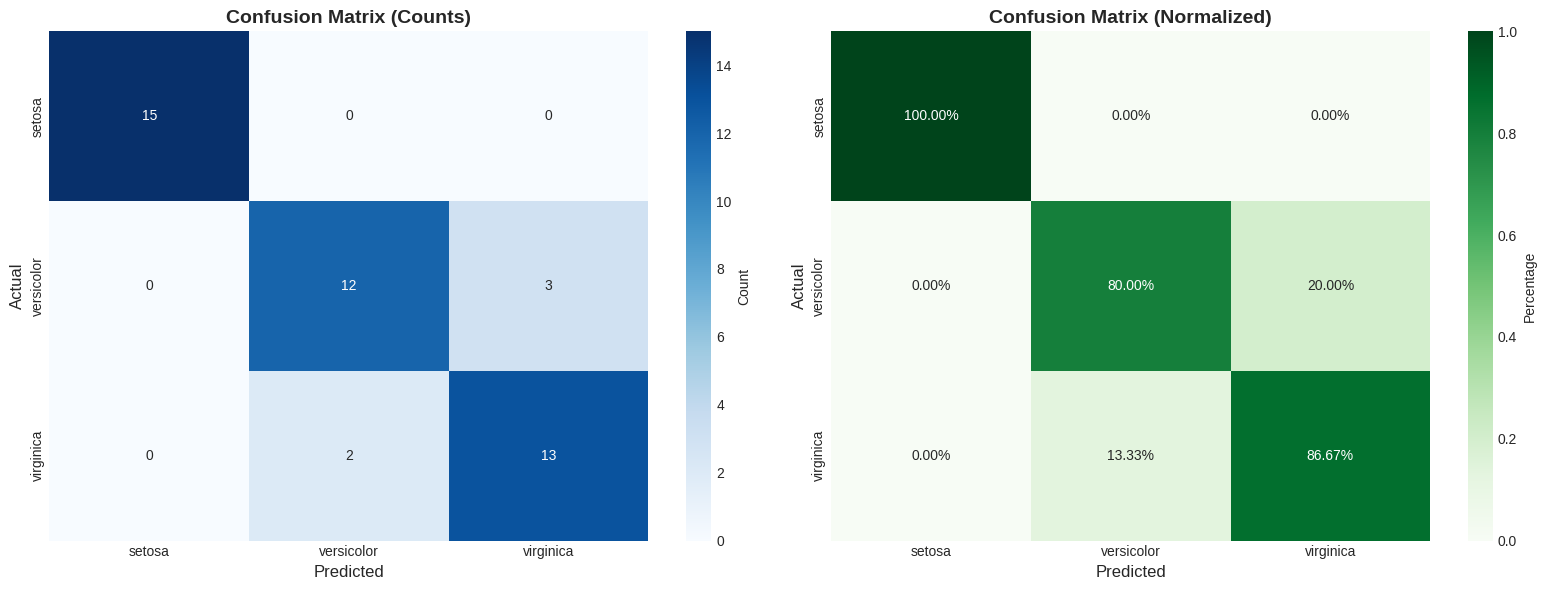

Confusion Matrix Analysis:
Correctly classified: 40 out of 45
Misclassified: 5 out of 45


In [ ]:
# Calculate confusion matrix
cm_clf = confusion_matrix(y_test_clf, y_test_pred_clf)

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Raw counts
sns.heatmap(cm_clf, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')

# Normalized (percentages)
cm_normalized = cm_clf.astype('float') / cm_clf.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            ax=axes[1], cbar_kws={'label': 'Percentage'})
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Confusion Matrix Analysis:")
print("=" * 70)
print(f"Correctly classified: {np.trace(cm_clf)} out of {np.sum(cm_clf)}")
print(f"Misclassified: {np.sum(cm_clf) - np.trace(cm_clf)} out of {np.sum(cm_clf)}")


## 7. Feature Importance - Classification

Feature importance shows which features are most useful for making predictions.


Feature Importances (Classification):
          Feature  Importance
petal length (cm)       0.549
 petal width (cm)       0.436
 sepal width (cm)       0.014
sepal length (cm)       0.000

📊 Interpretation:
  • Higher values indicate more important features for classification
  • Sum of all importances = 1.0


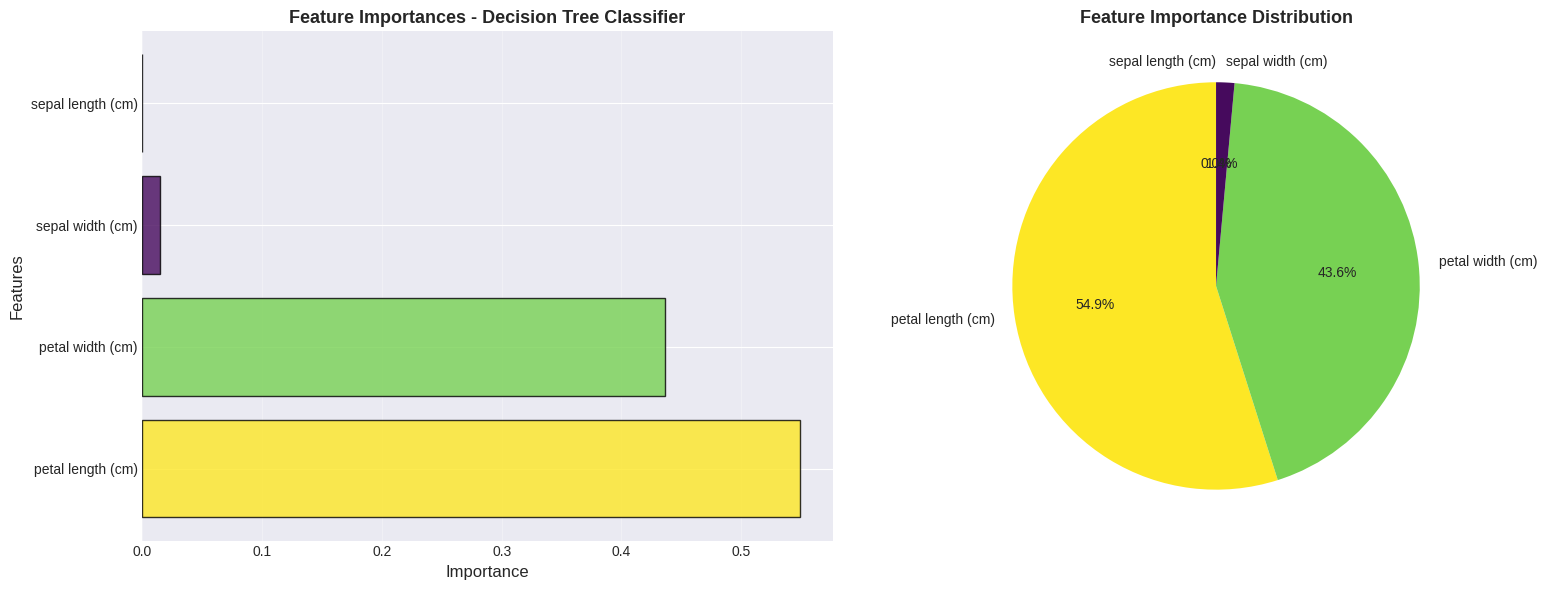

In [ ]:
# Get feature importances
feature_importance_clf = dt_classifier.feature_importances_

# Create DataFrame
importance_df_clf = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': feature_importance_clf
}).sort_values('Importance', ascending=False)

print("Feature Importances (Classification):")
print("=" * 70)
print(importance_df_clf.to_string(index=False))
print("\n📊 Interpretation:")
print("  • Higher values indicate more important features for classification")
print("  • Sum of all importances = 1.0")

# Visualize feature importances
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
colors = plt.cm.viridis(importance_df_clf['Importance'] / importance_df_clf['Importance'].max())
axes[0].barh(importance_df_clf['Feature'], importance_df_clf['Importance'],
             color=colors, alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_ylabel('Features', fontsize=12)
axes[0].set_title('Feature Importances - Decision Tree Classifier', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Pie chart
axes[1].pie(importance_df_clf['Importance'], labels=importance_df_clf['Feature'],
           autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Feature Importance Distribution', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


## 8. Tree Visualization - Classification

Visualizing the decision tree helps understand how it makes decisions.


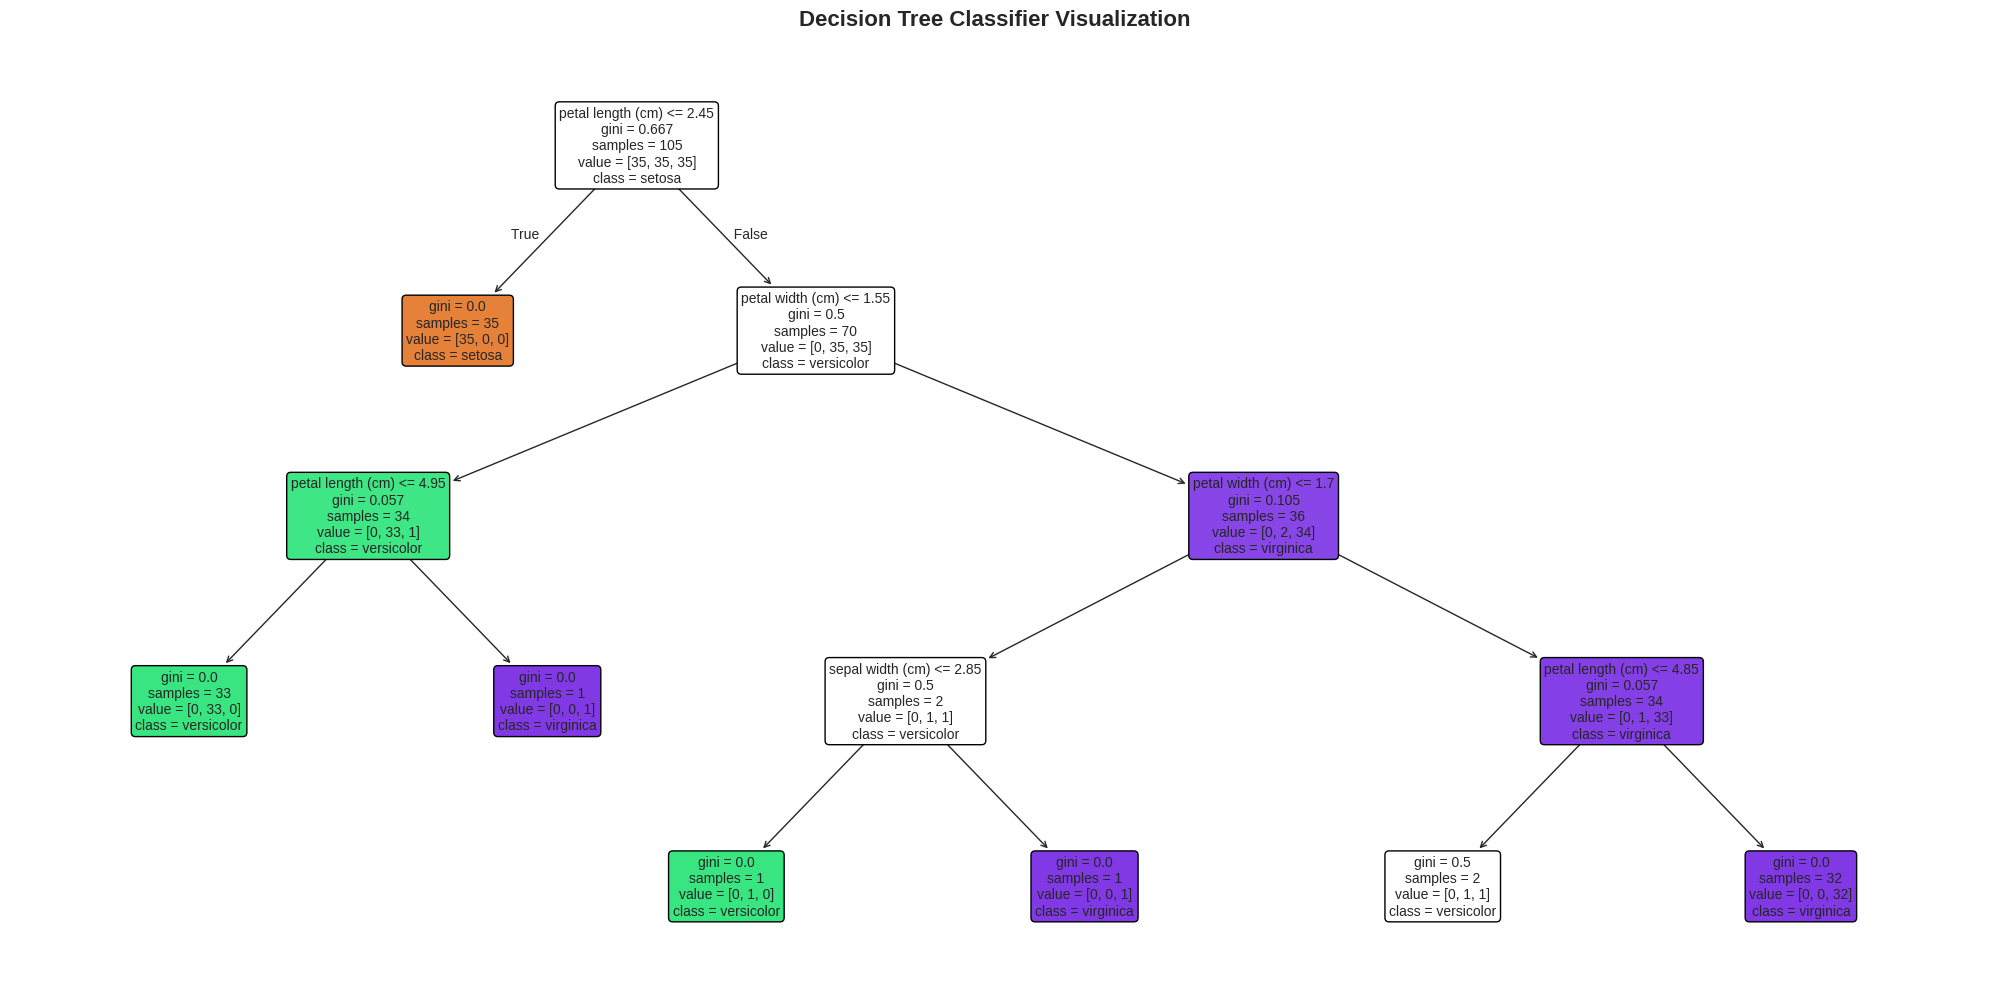


📖 How to Read the Tree:
• Each box represents a node
• Top line: Split condition (e.g., 'petal width <= 0.8')
• 'gini': Gini impurity at that node
• 'samples': Number of training samples reaching that node
• 'value': Number of samples per class [setosa, versicolor, virginica]
• 'class': Predicted class for samples reaching that node
• Color intensity: Confidence of prediction (darker = more confident)


In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Classifier Visualization', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📖 How to Read the Tree:")
print("=" * 70)
print("• Each box represents a node")
print("• Top line: Split condition (e.g., 'petal width <= 0.8')")
print("• 'gini': Gini impurity at that node")
print("• 'samples': Number of training samples reaching that node")
print("• 'value': Number of samples per class [setosa, versicolor, virginica]")
print("• 'class': Predicted class for samples reaching that node")
print("• Color intensity: Confidence of prediction (darker = more confident)")


In [ ]:
# Text representation of the tree
tree_rules = export_text(dt_classifier, feature_names=iris.feature_names)
print("\n\nDecision Tree Rules (Text Format):")
print("=" * 70)
print(tree_rules)




Decision Tree Rules (Text Format):
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- sepal width (cm) <= 2.85
|   |   |   |   |--- class: 1
|   |   |   |--- sepal width (cm) >  2.85
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



## 9. Hyperparameter Tuning - Classification

Finding optimal hyperparameters improves model performance and prevents overfitting.


In [ ]:
# Define parameter grid
param_grid_clf = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create GridSearchCV
grid_search_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_clf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit grid search
print("Performing Grid Search for optimal hyperparameters...")
print("This may take a moment...")
grid_search_clf.fit(X_train_clf, y_train_clf)

print("\nBest Hyperparameters:")
print("=" * 70)
for param, value in grid_search_clf.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search_clf.best_score_:.4f}")
print(f"Best Model Test Accuracy: {grid_search_clf.score(X_test_clf, y_test_clf):.4f}")


Performing Grid Search for optimal hyperparameters...
This may take a moment...

Best Hyperparameters:
  criterion: gini
  max_depth: 3
  min_samples_leaf: 1
  min_samples_split: 2

Best Cross-Validation Score: 0.9524
Best Model Test Accuracy: 0.9778


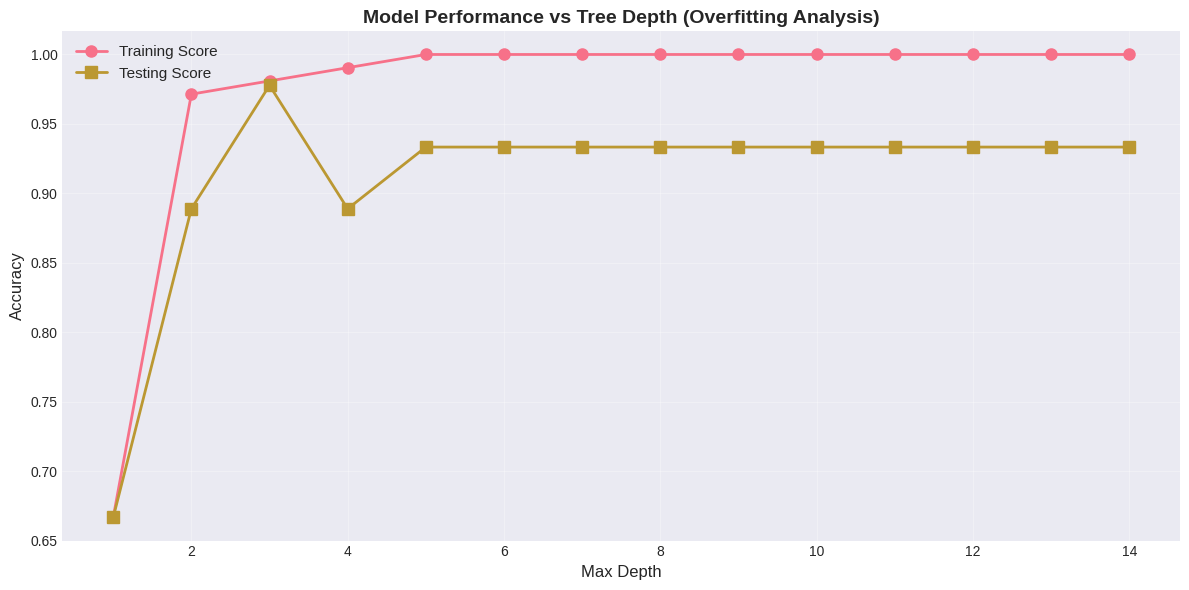

📊 Overfitting Analysis:
  • When training score >> test score → Overfitting
  • Optimal depth balances both scores
  • Best test score at depth = 3


In [ ]:
# Compare different max_depth values
depths = range(1, 15)
train_scores = []
test_scores = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train_clf, y_train_clf)
    train_scores.append(dt_temp.score(X_train_clf, y_train_clf))
    test_scores.append(dt_temp.score(X_test_clf, y_test_clf))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(depths, train_scores, 'o-', label='Training Score', linewidth=2, markersize=8)
plt.plot(depths, test_scores, 's-', label='Testing Score', linewidth=2, markersize=8)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance vs Tree Depth (Overfitting Analysis)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Overfitting Analysis:")
print("  • When training score >> test score → Overfitting")
print("  • Optimal depth balances both scores")
print(f"  • Best test score at depth = {depths[np.argmax(test_scores)]}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Retrieve the Best Model and Parameters
# ---------------------------------------------------------
# grid_search_clf has already found the best parameters. We extract the model here.
best_clf_model = grid_search_clf.best_estimator_

print(f"\n✅ Selected Splitting Criterion: {best_clf_model.criterion.upper()}")
print(f"✅ Selected Max Depth: {best_clf_model.max_depth}")
print(f"✅ Selected Min Samples Leaf: {best_clf_model.min_samples_leaf}")

# ---------------------------------------------------------
# 2. Generate Predictions
# ---------------------------------------------------------
y_train_pred = best_clf_model.predict(X_train_clf)
y_test_pred = best_clf_model.predict(X_test_clf)

# ---------------------------------------------------------
# 3. Calculate Metrics (Function for Reusability)
# ---------------------------------------------------------
def get_metrics(y_true, y_pred, set_name):
    return {
        'Set': set_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        # Using 'weighted' average to account for potential class imbalance
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

# Calculate for both sets
train_metrics = get_metrics(y_train_clf, y_train_pred, "Training Set")
test_metrics = get_metrics(y_test_clf, y_test_pred, "Testing Set")

# ---------------------------------------------------------
# 4. Display Performance Comparison (Train vs Test)
# ---------------------------------------------------------
results_df = pd.DataFrame([train_metrics, test_metrics])
results_df.set_index('Set', inplace=True)

print("\n📊 OPTIMIZED MODEL PERFORMANCE REPORT")
print("=" * 65)
print(results_df.round(4))
print("=" * 65)

# Automatic


✅ Selected Splitting Criterion: GINI
✅ Selected Max Depth: 3
✅ Selected Min Samples Leaf: 1

📊 OPTIMIZED MODEL PERFORMANCE REPORT
              Accuracy  Precision  Recall  F1-Score
Set                                                
Training Set     0.981      0.981   0.981     0.981
Testing Set      0.978      0.979   0.978     0.978



### 2. **Regression: Diabetes Dataset**
- **Purpose**: Predict disease progression one year after baseline
- **Samples**: 442 diabetes patients
- **Features** (10 baseline measurements):
  - `age`: Age in years
  - `sex`: Gender (1 = male, 2 = female)
  - `bmi`: Body mass index (weight in kg / (height in m)²)
  - `bp`: Average blood pressure (mm Hg)
  - `s1`: Total serum cholesterol (tc)
  - `s2`: Low-density lipoproteins (ldl)
  - `s3`: High-density lipoproteins (hdl)
  - `s4`: Total cholesterol / HDL ratio (tch)
  - `s5`: Log of serum triglycerides level (ltg)
  - `s6`: Blood sugar level (glu)
- **Target Variable**: Quantitative measure of disease progression (continuous value, 25-346)
- **Note**: All features are normalized and centered
- **Source**: Efron et al. (2004)
- **Use Case**: Regression problem for medical predictions


---
---
---

# PART 2: DECISION TREE REGRESSOR

---
---
---

## 10. Decision Tree Regressor - Data Loading

We'll use the **Diabetes Dataset**, which predicts disease progression based on patient features.


In [ ]:
# Load Diabetes dataset
diabetes = load_diabetes(as_frame=True)

# Create DataFrame
df_diabetes = diabetes.frame

print("=" * 70)
print("DIABETES DATASET FOR REGRESSION")
print("=" * 70)
print(f"Dataset shape: {df_diabetes.shape}")
print(f"Number of samples: {df_diabetes.shape[0]}")
print(f"Number of features: {len(diabetes.feature_names)}")
print(f"\nFeatures: {diabetes.feature_names}")
print(f"\nTarget: Disease progression (continuous value)")
print("\nFirst 5 rows:")
print(df_diabetes.head())

print("\nFeature Descriptions:")
print("  • age: Age in years")
print("  • sex: Gender")
print("  • bmi: Body mass index")
print("  • bp: Average blood pressure")
print("  • s1-s6: Six blood serum measurements")


DIABETES DATASET FOR REGRESSION
Dataset shape: (442, 11)
Number of samples: 442
Number of features: 10

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Target: Disease progression (continuous value)

First 5 rows:
     age    sex    bmi     bp     s1     s2     s3     s4     s5     s6  \
0  0.038  0.051  0.062  0.022 -0.044 -0.035 -0.043 -0.003  0.020 -0.018   
1 -0.002 -0.045 -0.051 -0.026 -0.008 -0.019  0.074 -0.039 -0.068 -0.092   
2  0.085  0.051  0.044 -0.006 -0.046 -0.034 -0.032 -0.003  0.003 -0.026   
3 -0.089 -0.045 -0.012 -0.037  0.012  0.025 -0.036  0.034  0.023 -0.009   
4  0.005 -0.045 -0.036  0.022  0.004  0.016  0.008 -0.003 -0.032 -0.047   

   target  
0   151.0  
1    75.0  
2   141.0  
3   206.0  
4   135.0  

Feature Descriptions:
  • age: Age in years
  • sex: Gender
  • bmi: Body mass index
  • bp: Average blood pressure
  • s1-s6: Six blood serum measurements


### 10.1 Exploratory Data Analysis - Regression Data


In [ ]:
# Statistical summary
print("Statistical Summary:")
print("=" * 70)
print(df_diabetes.describe())

# Target distribution
print("\n\nTarget Variable Statistics:")
print("=" * 70)
print(f"Mean: {df_diabetes['target'].mean():.2f}")
print(f"Median: {df_diabetes['target'].median():.2f}")
print(f"Std Dev: {df_diabetes['target'].std():.2f}")
print(f"Min: {df_diabetes['target'].min():.2f}")
print(f"Max: {df_diabetes['target'].max():.2f}")


Statistical Summary:
             age        sex        bmi         bp         s1         s2  \
count  4.420e+02  4.420e+02  4.420e+02  4.420e+02  4.420e+02  4.420e+02   
mean  -2.512e-19  1.231e-17 -2.246e-16 -4.798e-17 -1.381e-17  3.918e-17   
std    4.762e-02  4.762e-02  4.762e-02  4.762e-02  4.762e-02  4.762e-02   
min   -1.072e-01 -4.464e-02 -9.028e-02 -1.124e-01 -1.268e-01 -1.156e-01   
25%   -3.730e-02 -4.464e-02 -3.423e-02 -3.666e-02 -3.425e-02 -3.036e-02   
50%    5.383e-03 -4.464e-02 -7.284e-03 -5.670e-03 -4.321e-03 -3.819e-03   
75%    3.808e-02  5.068e-02  3.125e-02  3.564e-02  2.836e-02  2.984e-02   
max    1.107e-01  5.068e-02  1.706e-01  1.320e-01  1.539e-01  1.988e-01   

              s3         s4         s5         s6   target  
count  4.420e+02  4.420e+02  4.420e+02  4.420e+02  442.000  
mean  -5.777e-18 -9.043e-18  9.294e-17  1.130e-17  152.133  
std    4.762e-02  4.762e-02  4.762e-02  4.762e-02   77.093  
min   -1.023e-01 -7.639e-02 -1.261e-01 -1.378e-01   25.000 

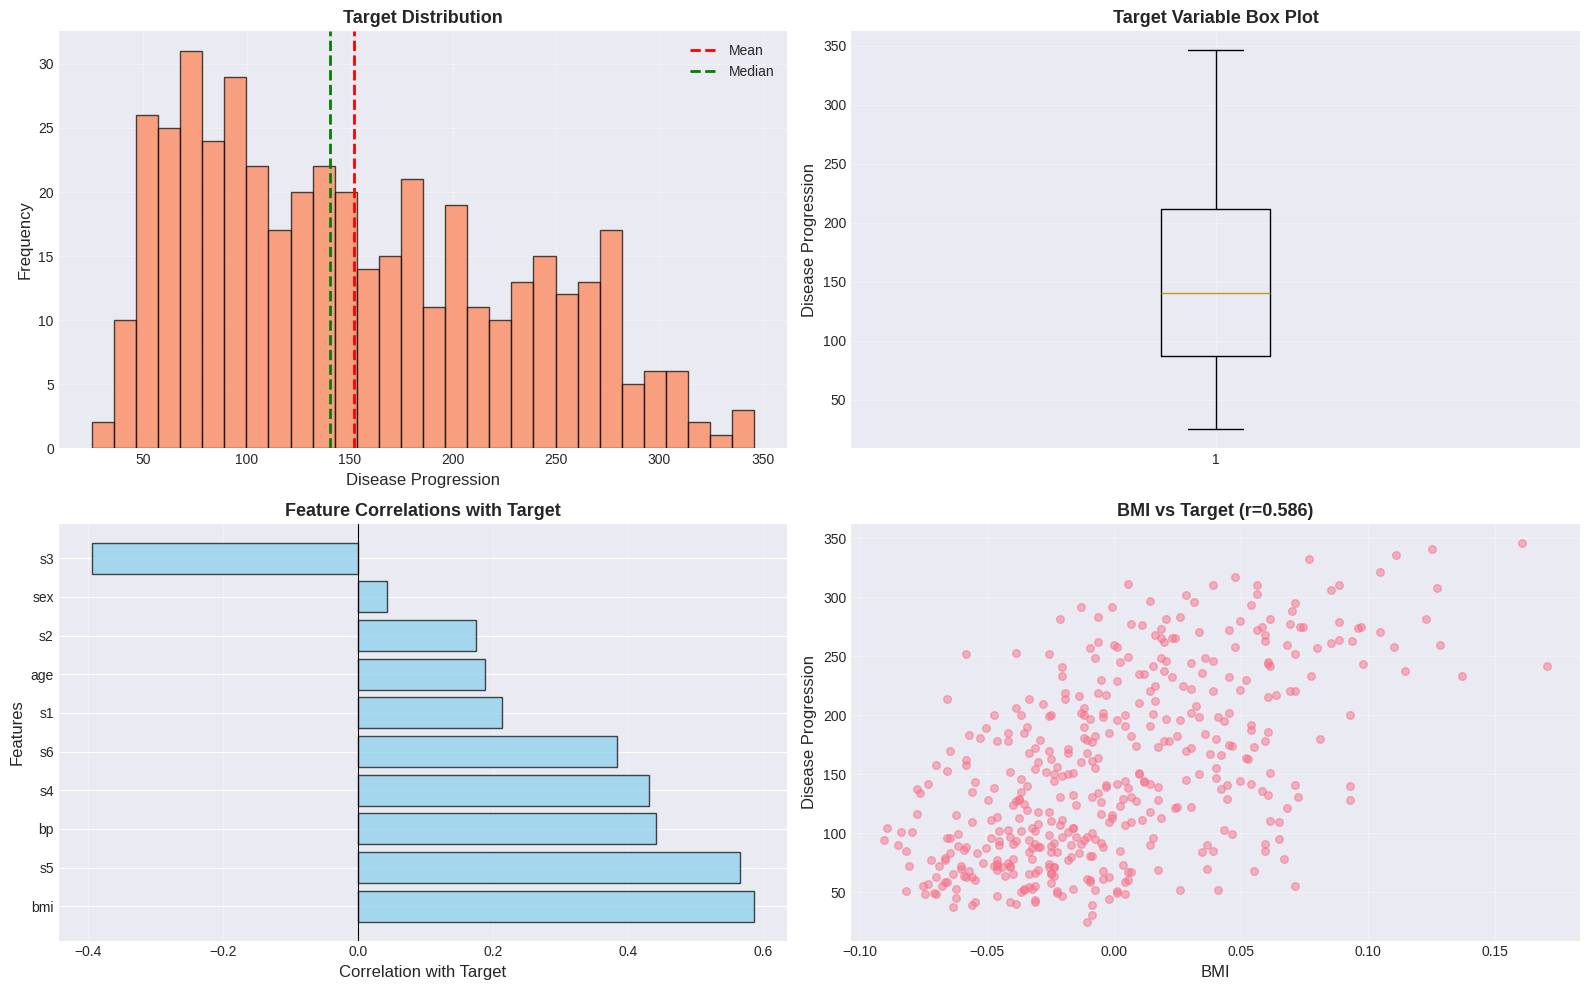

In [ ]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Target distribution
axes[0, 0].hist(df_diabetes['target'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0, 0].axvline(df_diabetes['target'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(df_diabetes['target'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_xlabel('Disease Progression', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Target Distribution', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot of target
axes[0, 1].boxplot(df_diabetes['target'], vert=True)
axes[0, 1].set_ylabel('Disease Progression', fontsize=12)
axes[0, 1].set_title('Target Variable Box Plot', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Correlation with target
correlations = df_diabetes.corr()['target'].drop('target').sort_values(ascending=False)
axes[1, 0].barh(correlations.index, correlations.values, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Correlation with Target', fontsize=12)
axes[1, 0].set_ylabel('Features', fontsize=12)
axes[1, 0].set_title('Feature Correlations with Target', fontsize=13, fontweight='bold')
axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Scatter: BMI vs Target (highest correlation)
axes[1, 1].scatter(df_diabetes['bmi'], df_diabetes['target'], alpha=0.5, s=30)
axes[1, 1].set_xlabel('BMI', fontsize=12)
axes[1, 1].set_ylabel('Disease Progression', fontsize=12)
axes[1, 1].set_title(f'BMI vs Target (r={df_diabetes["bmi"].corr(df_diabetes["target"]):.3f})',
                    fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 11. Understanding Variance Reduction for Regression

For regression, Decision Trees use **Variance Reduction** instead of Gini Impurity.

**Variance** measures the spread of target values in a node.

**Formula:** Variance = (1/n) × Σ(yᵢ - ȳ)²

**Variance Reduction** = Variance(parent) - Weighted Average Variance(children)

The tree chooses splits that maximize variance reduction (minimize variance in child nodes).


In [ ]:
# Example: Calculate Variance Reduction
print("Variance Reduction Example:")
print("=" * 70)

# Entire dataset variance
total_variance = np.var(df_diabetes['target'])
print(f"Variance of entire dataset: {total_variance:.2f}")

# Split by median BMI
median_bmi = df_diabetes['bmi'].median()
left_split = df_diabetes[df_diabetes['bmi'] <= median_bmi]['target']
right_split = df_diabetes[df_diabetes['bmi'] > median_bmi]['target']

left_variance = np.var(left_split)
right_variance = np.var(right_split)

print(f"\nAfter splitting on BMI (median = {median_bmi:.3f}):")
print(f"  Left node variance: {left_variance:.2f} ({len(left_split)} samples)")
print(f"  Right node variance: {right_variance:.2f} ({len(right_split)} samples)")

# Weighted average variance
weighted_variance = (len(left_split) * left_variance + len(right_split) * right_variance) / len(df_diabetes)
variance_reduction = total_variance - weighted_variance

print(f"\nWeighted average variance after split: {weighted_variance:.2f}")
print(f"Variance reduction: {variance_reduction:.2f}")
print(f"Percentage reduction: {(variance_reduction/total_variance)*100:.2f}%")


Variance Reduction Example:
Variance of entire dataset: 5929.88

After splitting on BMI (median = -0.007):
  Left node variance: 3144.47 (223 samples)
  Right node variance: 5701.29 (219 samples)

Weighted average variance after split: 4411.31
Variance reduction: 1518.57
Percentage reduction: 25.61%


## 12. Data Preparation - Regression


In [ ]:
# Prepare features and target
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Split the data (70% train, 30% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42
)

print("Data Split for Regression:")
print("=" * 70)
print(f"Training set: {X_train_reg.shape[0]} samples ({X_train_reg.shape[0]/len(X_diabetes)*100:.1f}%)")
print(f"Testing set: {X_test_reg.shape[0]} samples ({X_test_reg.shape[0]/len(X_diabetes)*100:.1f}%)")
print(f"\nFeature matrix shape: {X_diabetes.shape}")
print(f"Target vector shape: {y_diabetes.shape}")


Data Split for Regression:
Training set: 309 samples (69.9%)
Testing set: 133 samples (30.1%)

Feature matrix shape: (442, 10)
Target vector shape: (442,)


## 13. Building Decision Tree Regressor

### 13.1 Train the Model


In [ ]:
# Create Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(
    max_depth=5,               # Maximum depth of tree
    min_samples_split=10,      # Minimum samples required to split
    min_samples_leaf=5,        # Minimum samples in leaf node
    random_state=42
)

# Train the model
dt_regressor.fit(X_train_reg, y_train_reg)

print("Decision Tree Regressor - Model Information:")
print("=" * 70)
print(f"Max Depth: {dt_regressor.max_depth}")
print(f"Actual Tree Depth: {dt_regressor.get_depth()}")
print(f"Number of Leaves: {dt_regressor.get_n_leaves()}")
print(f"Number of Features: {dt_regressor.n_features_in_}")
print("\n✓ Model trained successfully!")


Decision Tree Regressor - Model Information:
Max Depth: 5
Actual Tree Depth: 5
Number of Leaves: 25
Number of Features: 10

✓ Model trained successfully!


### 13.2 Make Predictions


In [ ]:
# Make predictions
y_train_pred_reg = dt_regressor.predict(X_train_reg)
y_test_pred_reg = dt_regressor.predict(X_test_reg)

# Display sample predictions
print("Sample Predictions (First 10 Test Samples):")
print("=" * 70)
predictions_reg_df = pd.DataFrame({
    'Actual': y_test_reg[:10].values,
    'Predicted': y_test_pred_reg[:10],
    'Difference': y_test_reg[:10].values - y_test_pred_reg[:10],
    'Abs Error': np.abs(y_test_reg[:10].values - y_test_pred_reg[:10])
})

print(predictions_reg_df)


Sample Predictions (First 10 Test Samples):
   Actual  Predicted  Difference  Abs Error
0   219.0    187.882      31.118     31.118
1    70.0    190.974    -120.974    120.974
2   202.0    187.882      14.118     14.118
3   230.0    267.857     -37.857     37.857
4   111.0    118.860      -7.860      7.860
5    84.0    106.556     -22.556     22.556
6   242.0    225.750      16.250     16.250
7   272.0    267.857       4.143      4.143
8    94.0     99.800      -5.800      5.800
9    96.0    184.882     -88.882     88.882


## 14. Model Evaluation - Regression Metrics

### 14.1 MSE, RMSE, MAE, R²


In [ ]:
# Calculate metrics for training set
train_mse_reg = mean_squared_error(y_train_reg, y_train_pred_reg)
train_rmse_reg = np.sqrt(train_mse_reg)
train_mae_reg = mean_absolute_error(y_train_reg, y_train_pred_reg)
train_r2_reg = r2_score(y_train_reg, y_train_pred_reg)

# Calculate metrics for test set
test_mse_reg = mean_squared_error(y_test_reg, y_test_pred_reg)
test_rmse_reg = np.sqrt(test_mse_reg)
test_mae_reg = mean_absolute_error(y_test_reg, y_test_pred_reg)
test_r2_reg = r2_score(y_test_reg, y_test_pred_reg)

# Display results
print("DECISION TREE REGRESSOR - MODEL EVALUATION")
print("=" * 70)
print(f"\n{'Metric':<30} {'Training Set':<20} {'Testing Set':<20}")
print("-" * 70)
print(f"{'Mean Squared Error (MSE)':<30} {train_mse_reg:<20.4f} {test_mse_reg:<20.4f}")
print(f"{'Root Mean Squared Error (RMSE)':<30} {train_rmse_reg:<20.4f} {test_rmse_reg:<20.4f}")
print(f"{'Mean Absolute Error (MAE)':<30} {train_mae_reg:<20.4f} {test_mae_reg:<20.4f}")
print(f"{'R-squared (R²)':<30} {train_r2_reg:<20.4f} {test_r2_reg:<20.4f}")
print("=" * 70)

print("\n📊 Interpretation:")
print(f"  • RMSE: {test_rmse_reg:.2f} - Average prediction error")
print(f"  • MAE: {test_mae_reg:.2f} - Mean absolute error")
print(f"  • R²: {test_r2_reg:.4f} - Model explains {test_r2_reg*100:.2f}% of variance")


DECISION TREE REGRESSOR - MODEL EVALUATION

Metric                         Training Set         Testing Set         
----------------------------------------------------------------------
Mean Squared Error (MSE)       1963.2378            3577.8176           
Root Mean Squared Error (RMSE) 44.3084              59.8149             
Mean Absolute Error (MAE)      33.6157              47.7305             
R-squared (R²)                 0.6807               0.3372              

📊 Interpretation:
  • RMSE: 59.81 - Average prediction error
  • MAE: 47.73 - Mean absolute error
  • R²: 0.3372 - Model explains 33.72% of variance


### 14.2 Visualization of Predictions


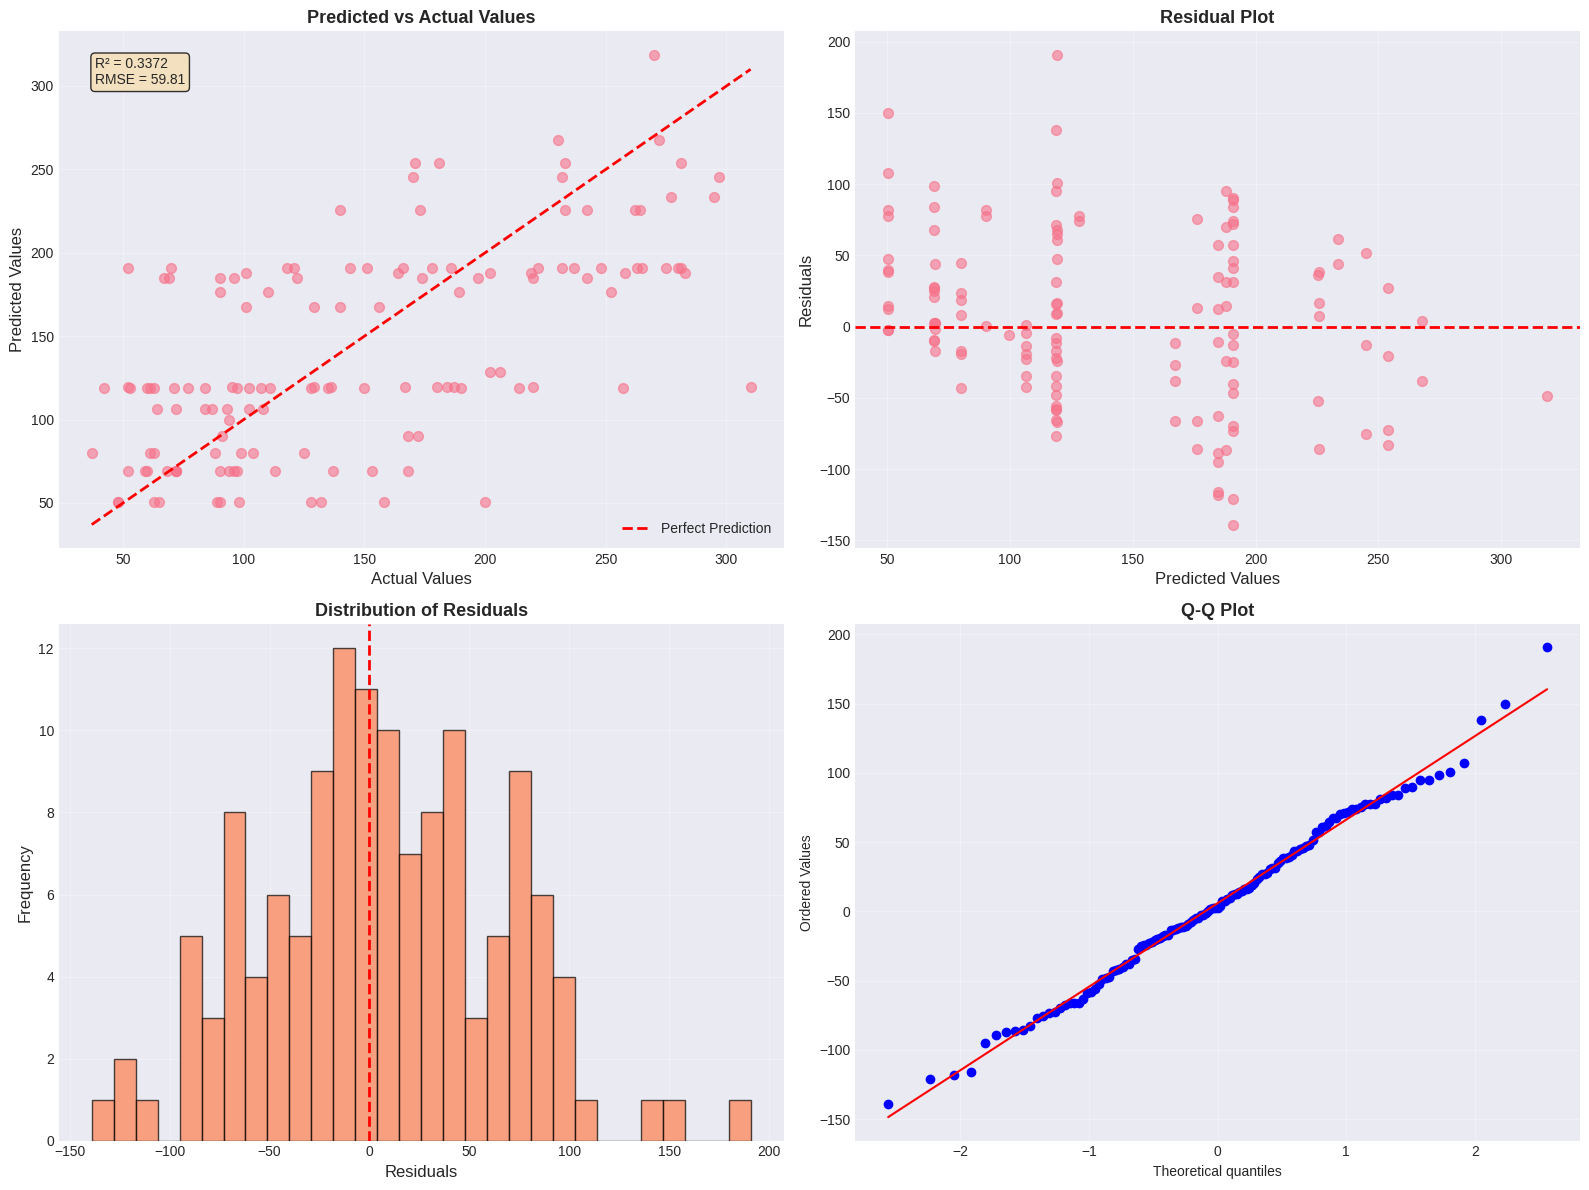

In [ ]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Predicted vs Actual
axes[0, 0].scatter(y_test_reg, y_test_pred_reg, alpha=0.6, s=50)
axes[0, 0].plot([y_test_reg.min(), y_test_reg.max()],
               [y_test_reg.min(), y_test_reg.max()],
               'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values', fontsize=12)
axes[0, 0].set_ylabel('Predicted Values', fontsize=12)
axes[0, 0].set_title('Predicted vs Actual Values', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.05, 0.95, f'R² = {test_r2_reg:.4f}\nRMSE = {test_rmse_reg:.2f}',
               transform=axes[0, 0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Residuals vs Predicted
residuals_reg = y_test_reg - y_test_pred_reg
axes[0, 1].scatter(y_test_pred_reg, residuals_reg, alpha=0.6, s=50)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Residuals distribution
axes[1, 0].hist(residuals_reg, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(residuals_reg, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 15. Feature Importance - Regression


Feature Importances (Regression):
Feature  Importance
    bmi       0.599
     s5       0.171
     bp       0.076
     s1       0.042
     s3       0.040
     s6       0.023
     s2       0.020
     s4       0.018
    age       0.009
    sex       0.002


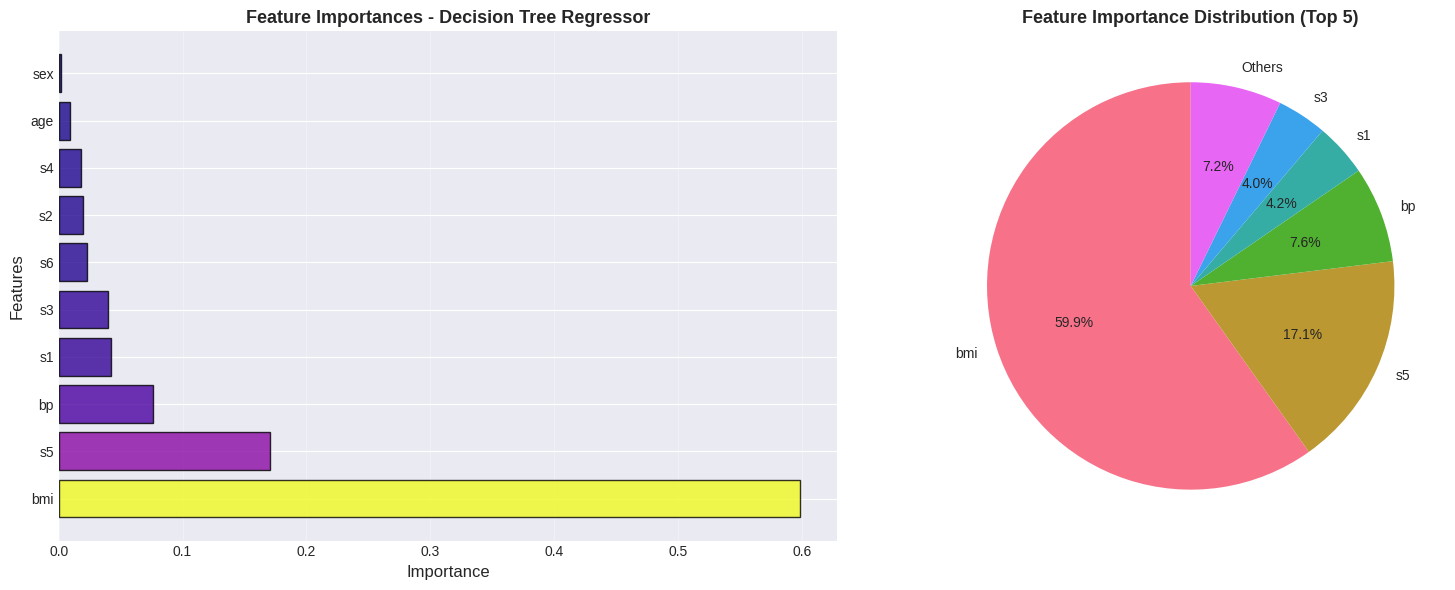

In [ ]:
# Get feature importances
feature_importance_reg = dt_regressor.feature_importances_

# Create DataFrame
importance_df_reg = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Importance': feature_importance_reg
}).sort_values('Importance', ascending=False)

print("Feature Importances (Regression):")
print("=" * 70)
print(importance_df_reg.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
colors = plt.cm.plasma(importance_df_reg['Importance'] / importance_df_reg['Importance'].max())
axes[0].barh(importance_df_reg['Feature'], importance_df_reg['Importance'],
             color=colors, alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_ylabel('Features', fontsize=12)
axes[0].set_title('Feature Importances - Decision Tree Regressor', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Pie chart (top 5 features)
top_5 = importance_df_reg.head(5)
other = importance_df_reg.iloc[5:]['Importance'].sum()
pie_data = list(top_5['Importance']) + [other]
pie_labels = list(top_5['Feature']) + ['Others']

axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Feature Importance Distribution (Top 5)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


## 16. Tree Visualization - Regression


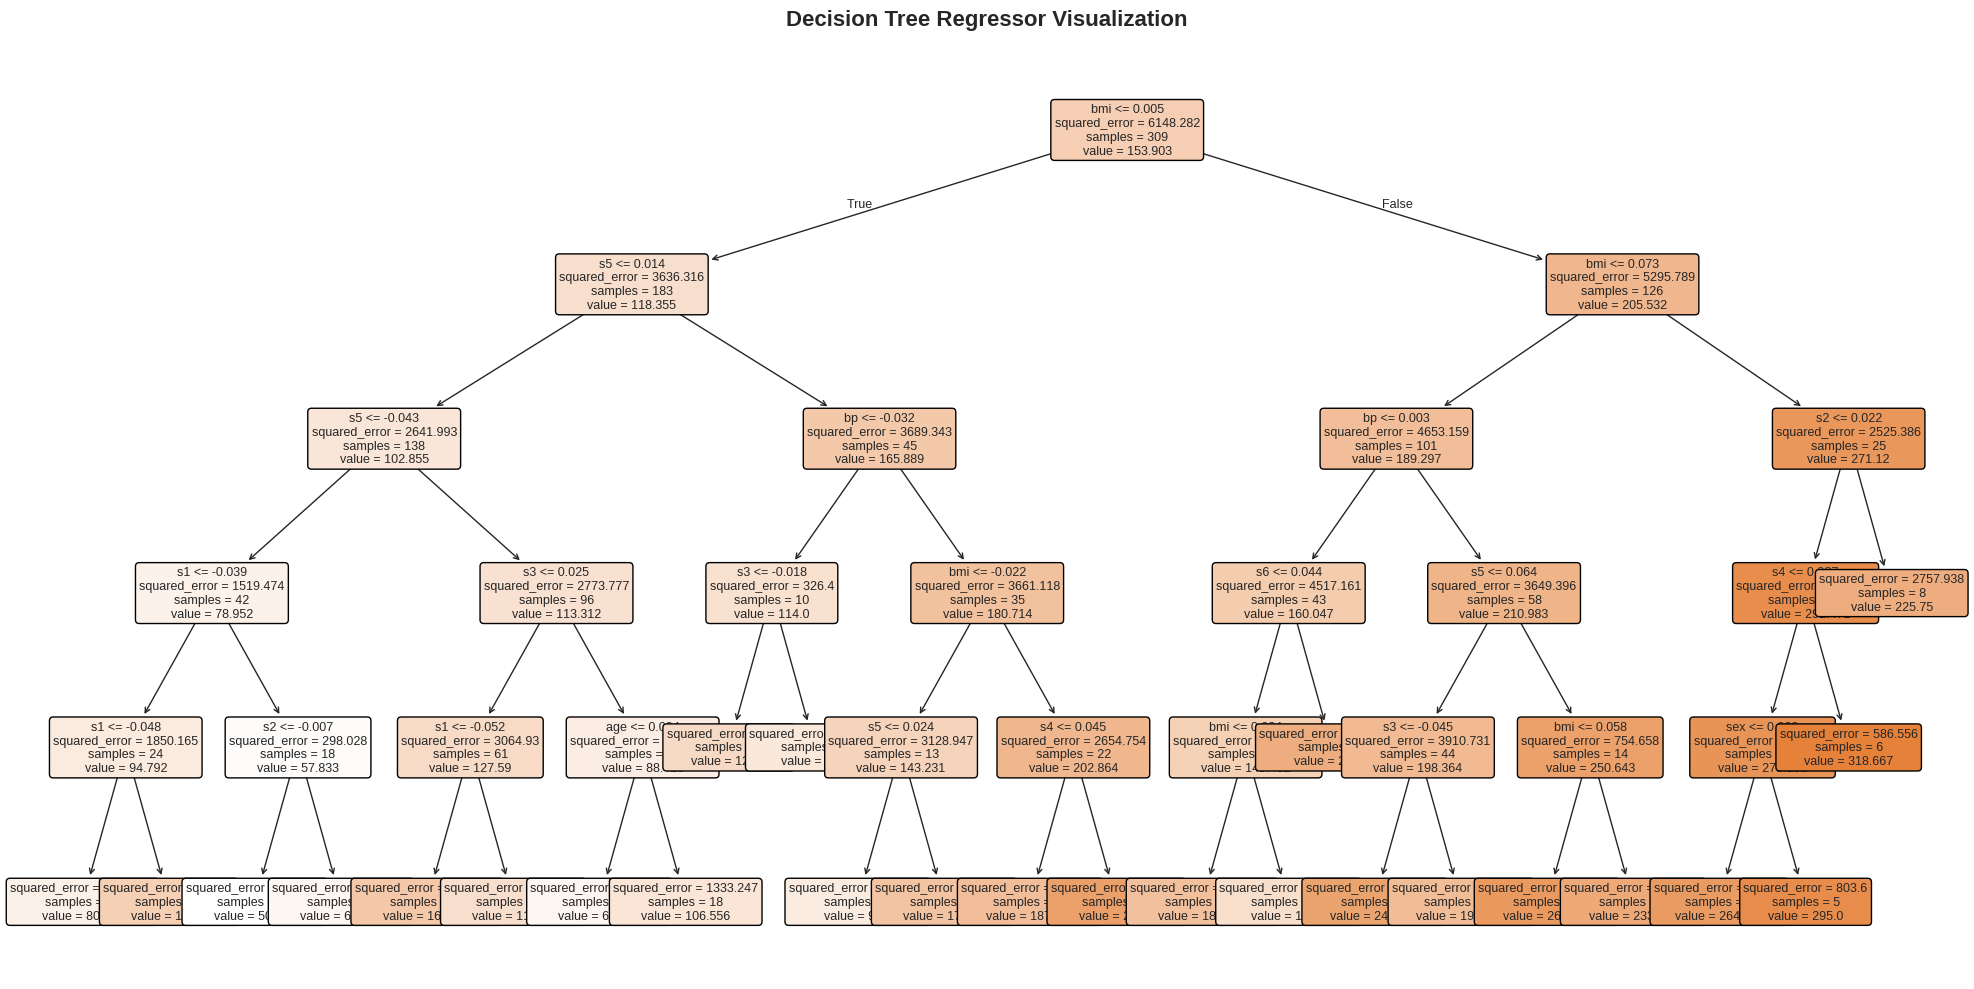


📖 How to Read the Regression Tree:
• Each box represents a node
• Top line: Split condition (e.g., 'bmi <= 0.05')
• 'squared_error': Variance (MSE) at that node
• 'samples': Number of training samples reaching that node
• 'value': Predicted target value for samples in that node
• Color intensity: Value magnitude (darker = higher prediction)


In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor,
          feature_names=diabetes.feature_names,
          filled=True,
          rounded=True,
          fontsize=9)
plt.title('Decision Tree Regressor Visualization', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📖 How to Read the Regression Tree:")
print("=" * 70)
print("• Each box represents a node")
print("• Top line: Split condition (e.g., 'bmi <= 0.05')")
print("• 'squared_error': Variance (MSE) at that node")
print("• 'samples': Number of training samples reaching that node")
print("• 'value': Predicted target value for samples in that node")
print("• Color intensity: Value magnitude (darker = higher prediction)")


## 17. Hyperparameter Tuning - Regression


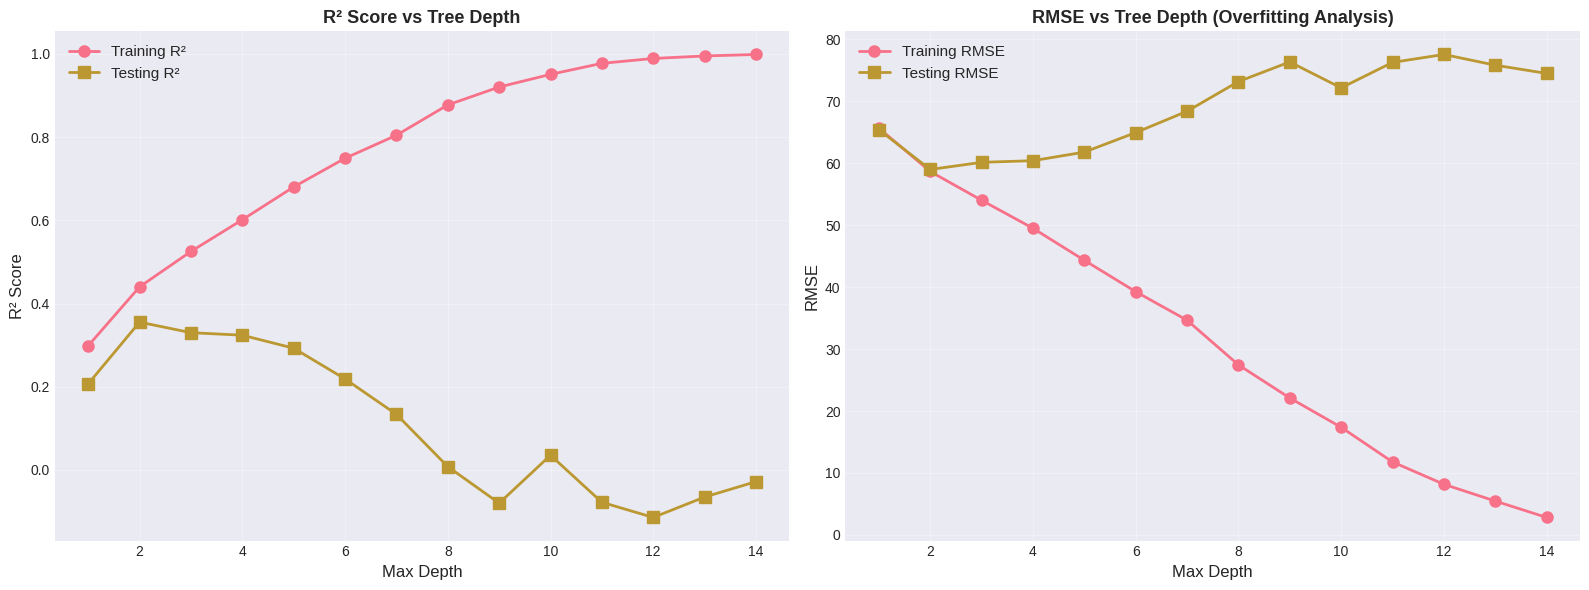

📊 Overfitting Analysis:
  • As depth increases, training error decreases (R² increases)
  • Test error may increase after optimal depth → Overfitting
  • Best test R² at depth = 2 (R² = 0.3554)
  • Best test RMSE at depth = 2 (RMSE = 58.99)


In [ ]:
# Compare different max_depth values
depths = range(1, 15)
train_scores_reg = []
test_scores_reg = []
train_rmse_reg_list = []
test_rmse_reg_list = []

for depth in depths:
    dt_temp = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_temp.fit(X_train_reg, y_train_reg)

    train_pred = dt_temp.predict(X_train_reg)
    test_pred = dt_temp.predict(X_test_reg)

    train_scores_reg.append(dt_temp.score(X_train_reg, y_train_reg))
    test_scores_reg.append(dt_temp.score(X_test_reg, y_test_reg))

    train_rmse_reg_list.append(np.sqrt(mean_squared_error(y_train_reg, train_pred)))
    test_rmse_reg_list.append(np.sqrt(mean_squared_error(y_test_reg, test_pred)))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# R² scores
axes[0].plot(depths, train_scores_reg, 'o-', label='Training R²', linewidth=2, markersize=8)
axes[0].plot(depths, test_scores_reg, 's-', label='Testing R²', linewidth=2, markersize=8)
axes[0].set_xlabel('Max Depth', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score vs Tree Depth', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# RMSE
axes[1].plot(depths, train_rmse_reg_list, 'o-', label='Training RMSE', linewidth=2, markersize=8)
axes[1].plot(depths, test_rmse_reg_list, 's-', label='Testing RMSE', linewidth=2, markersize=8)
axes[1].set_xlabel('Max Depth', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('RMSE vs Tree Depth (Overfitting Analysis)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Overfitting Analysis:")
print("  • As depth increases, training error decreases (R² increases)")
print("  • Test error may increase after optimal depth → Overfitting")
print(f"  • Best test R² at depth = {depths[np.argmax(test_scores_reg)]} (R² = {max(test_scores_reg):.4f})")
print(f"  • Best test RMSE at depth = {depths[np.argmin(test_rmse_reg_list)]} (RMSE = {min(test_rmse_reg_list):.2f})")


⏳ Starting Hyperparameter Optimization...
   Testing all parameter combinations on Training Data...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits

✅ OPTIMIZATION COMPLETE!
----------------------------------------
Best Depth: 2
Best Split: 2
Best Leaf:  1
----------------------------------------

📊 FINAL PERFORMANCE REPORT (Best Model)
              R² Score    RMSE     MAE
Dataset                               
Training Set     0.440  58.672  48.480
Testing Set      0.355  58.989  46.497
✅ SUCCESS: Good Generalization. R² Gap is 0.08


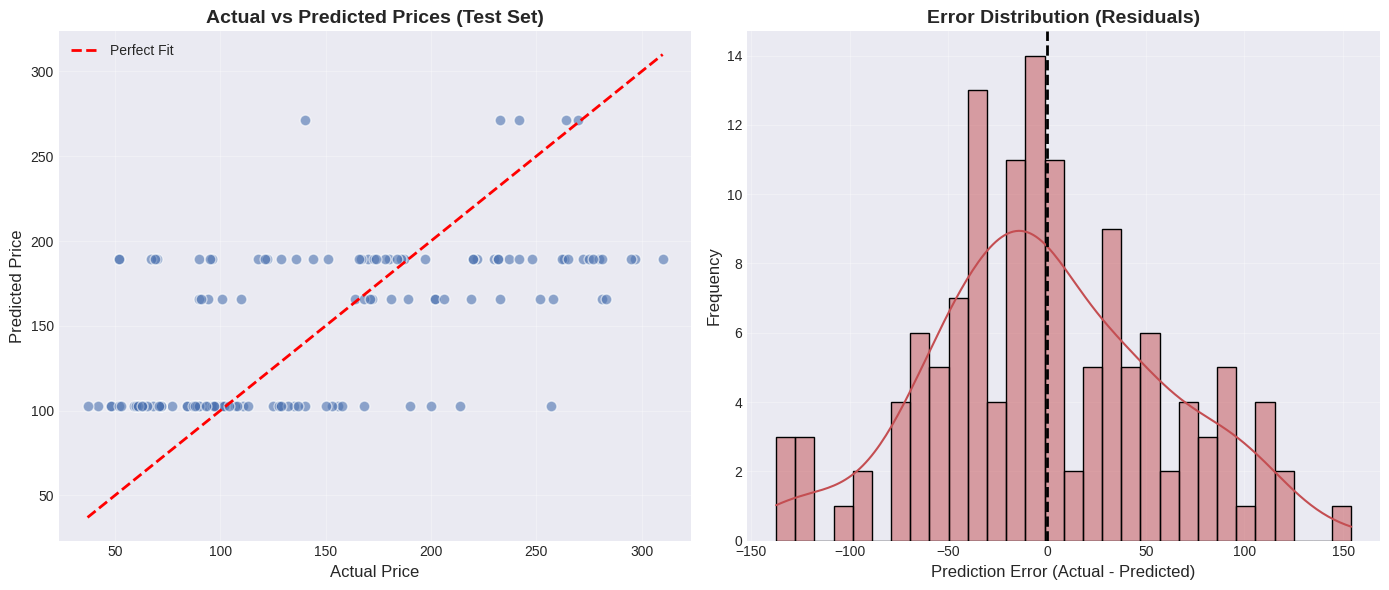

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# =============================================================================
# STEP 1: HYPERPARAMETER OPTIMIZATION (GRID SEARCH)
# =============================================================================

# 1. Define the parameter grid
# We test multiple combinations to find the "sweet spot"
param_grid_reg = {
    'max_depth': [1, 2, 5, 10 ],       # Control tree depth
    'min_samples_split': [1, 2, 5, 10, 20],         # Min samples to create a new branch
    'min_samples_leaf': [1, 2, 5, 10, 20],           # Min samples required in a leaf node
    'criterion': ['squared_error', 'absolute_error'] # Error metric
}

# 2. Initialize GridSearchCV
# cv=5 means 5-Fold Cross Validation (robust testing)
grid_search_reg = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_reg,
    cv=5,
    scoring='neg_mean_squared_error', # We want to minimize error
    n_jobs=-1,
    verbose=1
)

print("⏳ Starting Hyperparameter Optimization...")
print("   Testing all parameter combinations on Training Data...")
grid_search_reg.fit(X_train_reg, y_train_reg)

# 3. Retrieve the Best Model
best_reg_model = grid_search_reg.best_estimator_

print("\n✅ OPTIMIZATION COMPLETE!")
print("-" * 40)
print(f"Best Depth: {grid_search_reg.best_params_['max_depth']}")
print(f"Best Split: {grid_search_reg.best_params_['min_samples_split']}")
print(f"Best Leaf:  {grid_search_reg.best_params_['min_samples_leaf']}")
print("-" * 40)


# =============================================================================
# STEP 2: PREDICTION & EVALUATION (TRAIN vs TEST)
# =============================================================================

# 1. Make Predictions using the Best Model
y_train_pred = best_reg_model.predict(X_train_reg)
y_test_pred = best_reg_model.predict(X_test_reg)

# 2. Calculate Regression Metrics
def calculate_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        "Dataset": set_name,
        "R² Score": r2,       # Closer to 1.0 is better
        "RMSE": rmse,         # Lower is better
        "MAE": mae            # Lower is better
    }

metrics_train = calculate_metrics(y_train_reg, y_train_pred, "Training Set")
metrics_test = calculate_metrics(y_test_reg, y_test_pred, "Testing Set")

# 3. Display Results Table
results_df = pd.DataFrame([metrics_train, metrics_test])
results_df.set_index("Dataset", inplace=True)

print("\n📊 FINAL PERFORMANCE REPORT (Best Model)")
print("=" * 60)
print(results_df.round(4))
print("=" * 60)

# 4. Overfitting Check
r2_gap = metrics_train["R² Score"] - metrics_test["R² Score"]
if r2_gap > 0.15:
    print(f"⚠️ WARNING: High Overfitting! R² Gap is {r2_gap:.2f}")
else:
    print(f"✅ SUCCESS: Good Generalization. R² Gap is {r2_gap:.2f}")


# =============================================================================
# STEP 3: VISUALIZATION (ACTUAL vs PREDICTED)
# =============================================================================

plt.figure(figsize=(14, 6))

# Plot 1: Scatter Plot (Actual vs Predicted)
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_test_pred, alpha=0.6, color='#4c72b0', edgecolors='w', s=60)
# Perfect prediction line (y = x)
min_val = min(y_test_reg.min(), y_test_pred.min())
max_val = max(y_test_reg.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')

plt.title('Actual vs Predicted Prices (Test Set)', fontsize=14, fontweight='bold')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals (Error Distribution)
plt.subplot(1, 2, 2)
residuals = y_test_reg - y_test_pred
sns.histplot(residuals, bins=30, kde=True, color='#c44e52')
plt.axvline(x=0, color='black', linestyle='--', lw=2)

plt.title('Error Distribution (Residuals)', fontsize=14, fontweight='bold')
plt.xlabel('Prediction Error (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🌳 Generating Decision Tree Diagram...


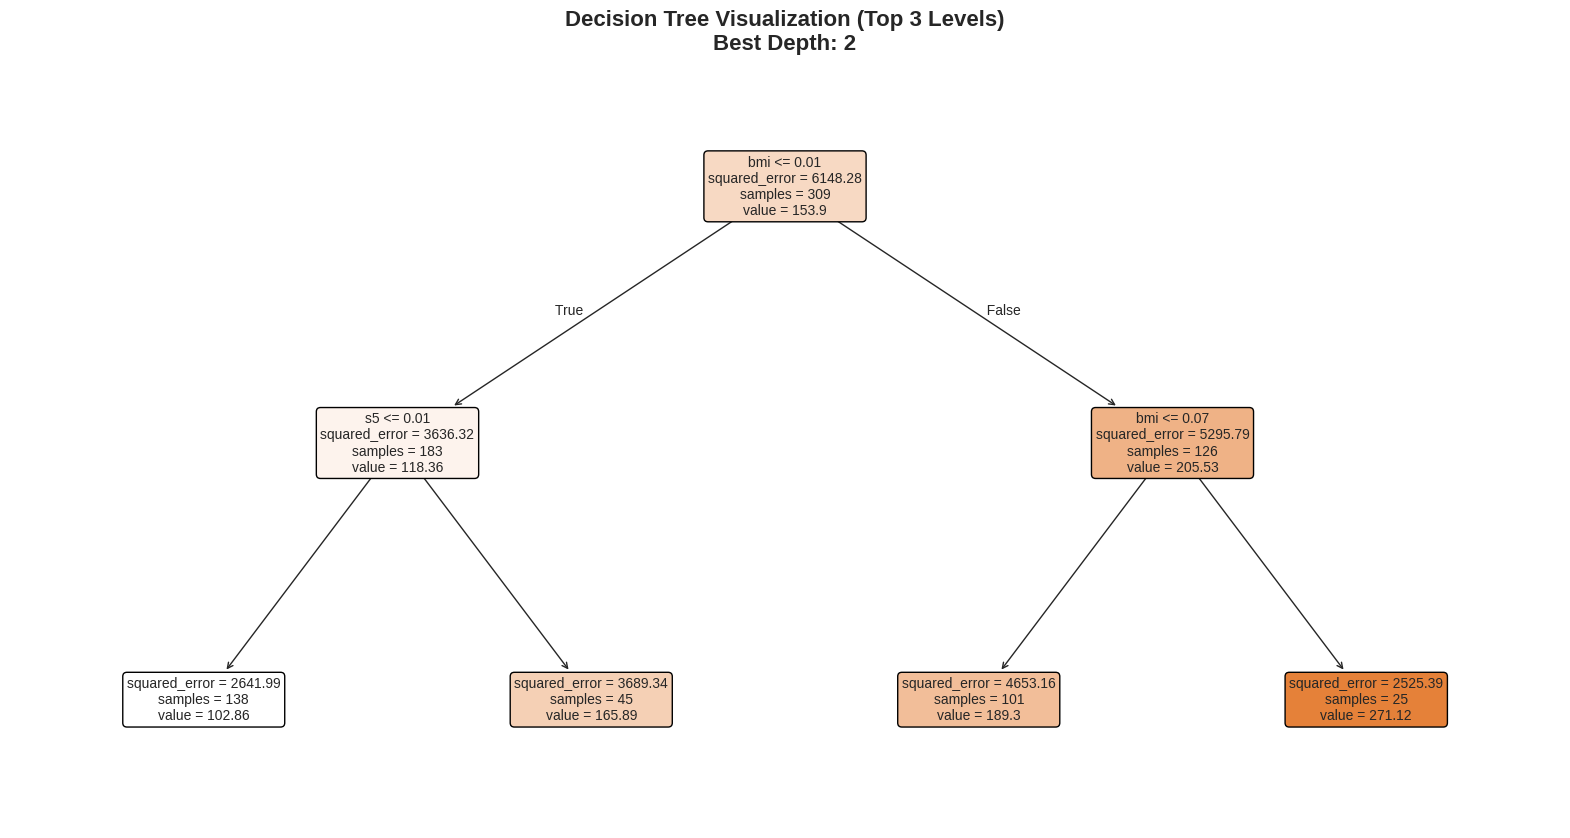

ℹ️ NOTE: This plot shows only the top 3 levels for readability.
   The darker the color, the higher the predicted price.


In [ ]:
from sklearn.tree import plot_tree

# =============================================================================
# STEP 4: VISUALIZE THE DECISION TREE STRUCTURE
# =============================================================================

print("\n🌳 Generating Decision Tree Diagram...")

plt.figure(figsize=(20, 10))  # Set a large figure size for better visibility

# We limit max_depth=3 for the plot to keep it readable.
# (The actual model might be deeper, but we only want to see the main logic)
plot_tree(
    best_reg_model,
    feature_names=X_train_reg.columns,  # Show feature names (e.g., MedInc, HouseAge)
    filled=True,                        # Color the nodes based on value (darker = higher price)
    rounded=True,                       # Round corners for better aesthetics
    fontsize=10,                        # Font size
    max_depth=3,                        # Limit depth for visualization purposes
    precision=2                         # Decimal precision
)

plt.title(f"Decision Tree Visualization (Top 3 Levels)\nBest Depth: {best_reg_model.max_depth}", fontsize=16, fontweight='bold')
plt.show()

print("ℹ️ NOTE: This plot shows only the top 3 levels for readability.")
print("   The darker the color, the higher the predicted price.")

---
## 📚 Additional Resources

### Further Reading:
- [Scikit-learn Decision Trees Documentation](https://scikit-learn.org/stable/modules/tree.html)
- [Understanding Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)
- [Information Gain and Entropy](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees)
- [Feature Importance in Trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

### Practice Exercises:
1. **Try Different Datasets**: Apply Decision Trees to wine quality, breast cancer, or housing datasets
2. **Feature Engineering**: Create new features and see how they impact tree structure
3. **Compare Criteria**: Test 'gini' vs 'entropy' for classification
4. **Ensemble Methods**: Combine multiple trees (Random Forest, XGBoost)
5. **Cost-Complexity Pruning**: Use `ccp_alpha` parameter to automatically prune trees
6. **Class Imbalance**: Handle imbalanced datasets with `class_weight` parameter

### Key Formulas Reference:

**Gini Impurity:**
$$Gini = 1 - \\sum_{i=1}^{C} p_i^2$$

**Entropy:**
$$Entropy = -\\sum_{i=1}^{C} p_i \\log_2(p_i)$$

**Variance:**
$$Variance = \\frac{1}{n} \\sum_{i=1}^{n} (y_i - \\bar{y})^2$$

**Information Gain:**
$$IG = Entropy(parent) - \\sum_{j} \\frac{n_j}{n} Entropy(child_j)$$

---

**Created for educational purposes**  
**Datasets:** Iris (Classification), Diabetes (Regression) from Scikit-learn  
**License:** Open Source
